In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Global_tomerge as global_nav
import Global_display_functions as plt_glob
from IPython.display import Image
import matplotlib.image as mpimg
import math

Setting Parameters to display

In [2]:
object_corners = {
    'Quadrilateral_1': [(53, 107), (107, 107), (107, 53), (53, 53)],
    'Quadrilateral_2': [(120, 200), (200, 280), (280, 200), (200, 120)],
    'Quadrilateral_3': [(243, 87), (297, 87), (297, 33), (243, 33)]
}

SandG = {
"robot" : (50,15),
"goal" : (255, 250)
}

robot_size = 13

The function grow obstacles is diffine for quadrilaterals since we had already decided to use only quadrilaterals as obstacles to ease the implementation. It takes the position of the oposite points and calculate the angle betweeen the points in order to find the values deltax and deltay that we should add to space the points by a value of half the robot size following the diagonal. Hence it will grow the obstacles to avoid collision. 
To add or remove the value deltax and deltay. I considered all the possibilities (case 1 to 4)

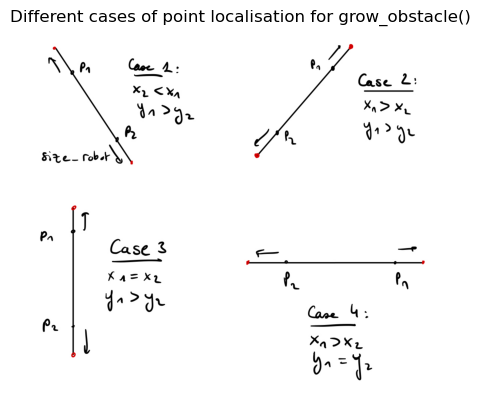

In [3]:
Image(filename='IMG_40C117ACEF66-1.jpeg')
img = mpimg.imread('IMG_40C117ACEF66-1.jpeg')
plt.imshow(img)
plt.axis('off')
plt.title('Different cases of point localisation for grow_obstacle()') 
plt.show()

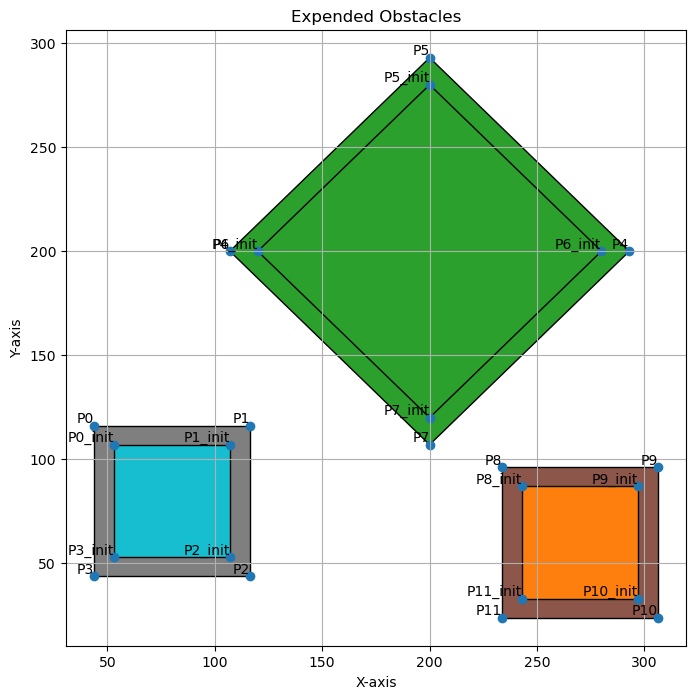

In [4]:
expended_corners = global_nav.grow_obstacles(object_corners, robot_size)
plt_glob.plot_expended_obstacles(object_corners, SandG, expended_corners)